<a href="https://colab.research.google.com/github/strange-hawk/ml_nn/blob/master/cifar_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [0]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),strides=(1,1),padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),strides=(1,1),padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,verbose=0)

In [34]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=[x_test,y_cat_test],callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 153us/sample - loss: 1.4326 - accuracy: 0.4920 - val_loss: 1.1933 - val_accuracy: 0.5765
Epoch 2/15
50000/50000 [==============================] - 7s 146us/sample - loss: 1.0923 - accuracy: 0.6212 - val_loss: 1.0873 - val_accuracy: 0.6215
Epoch 3/15
50000/50000 [==============================] - 7s 145us/sample - loss: 0.9296 - accuracy: 0.6771 - val_loss: 1.0266 - val_accuracy: 0.6451
Epoch 4/15
50000/50000 [==============================] - 7s 149us/sample - loss: 0.8025 - accuracy: 0.7238 - val_loss: 1.0002 - val_accuracy: 0.6633
Epoch 5/15
50000/50000 [==============================] - 7s 146us/sample - loss: 0.6982 - accuracy: 0.7606 - val_loss: 1.0812 - val_accuracy: 0.6516
Epoch 6/15
50000/50000 [==============================] - 7s 147us/sample - loss: 0.5969 - accuracy: 0.7934 - val_loss: 1.0838 - val_accuracy: 0.6683


In [0]:
metrics=pd.DataFrame(model.history.history)

In [36]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.432590,0.49200,1.193290,0.5765
1,1.092319,0.62124,1.087256,0.6215
2,0.929551,0.67712,1.026625,0.6451
3,0.802461,0.72384,1.000233,0.6633
4,0.698226,0.76058,1.081244,0.6516
5,0.596895,0.79338,1.083750,0.6683


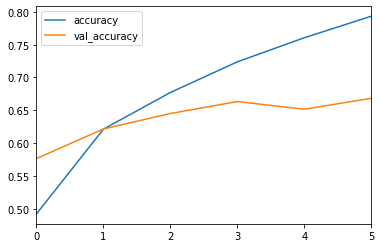

In [37]:
metrics[['accuracy','val_accuracy']].plot()

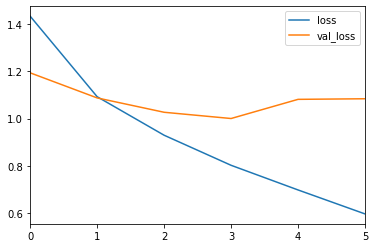

In [38]:
metrics[['loss','val_loss']].plot()

In [41]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0837501314163207, 0.6683]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.87      0.72      0.79      1000
           2       0.58      0.51      0.54      1000
           3       0.45      0.58      0.51      1000
           4       0.63      0.63      0.63      1000
           5       0.58      0.52      0.55      1000
           6       0.72      0.79      0.75      1000
           7       0.78      0.67      0.72      1000
           8       0.72      0.81      0.76      1000
           9       0.70      0.78      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [45]:
print(confusion_matrix(y_test,model.predict_classes(x_test)))

[[680   8  57  25  28   6   9   9 122  56]
 [ 26 722  21  22   3   4  18   6  45 133]
 [ 57  11 505 112 100  68  76  27  26  18]
 [ 17   6  58 576  60 132  67  30  26  28]
 [ 18   3  70 102 628  50  70  41  15   3]
 [  6   7  63 251  44 524  31  47  13  14]
 [  7   8  31  73  36  27 787  12   7  12]
 [ 17   0  44  64  78  83  13 667   8  26]
 [ 54  24  15  21  12   8   8   5 812  41]
 [ 31  41  13  29   6   9  17  15  57 782]]


In [0]:
import seaborn as sns

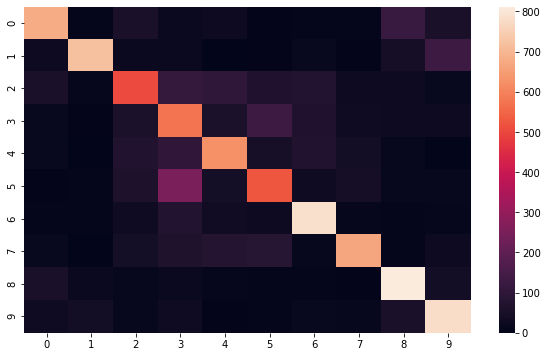

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,model.predict_classes(x_test)))